### Carzam
Trying to do transfer learning on the Vgg16 model for predicting car make/model.

In [1]:
import os

import keras
from keras.preprocessing import image

from matplotlib import pyplot as plt
import numpy as np
from numpy.random import permutation
np.set_printoptions(precision=4, linewidth=100)

Using Theano backend.
//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Contains some utilty functions
# TODO Figure out what "reload" does
import utils; reload(utils)
from utils import plots
# Contains the trained Vgg16 model (2014 winner of ImageNet)
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [3]:
path = "../data/carzam/"
# path = "../data/carzam/sample/"
# Path containing trained models
model_path = path + 'models/'
if not os.path.exists(model_path): os.mkdir(model_path)

In [4]:
# For showing the plots in this webpage
%matplotlib inline

In [5]:
# If running out of memory or using an older GPU, decrease this number
batch_size = 4

In [6]:
vgg = Vgg16()
# Grab a few images at a time for training and validation
# batches = vgg.get_batches(path+'train', batch_size=batch_size)
# val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

In [7]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 434 images belonging to 5 classes.
Found 54 images belonging to 5 classes.


In [17]:
imgs, labels = next(batches)

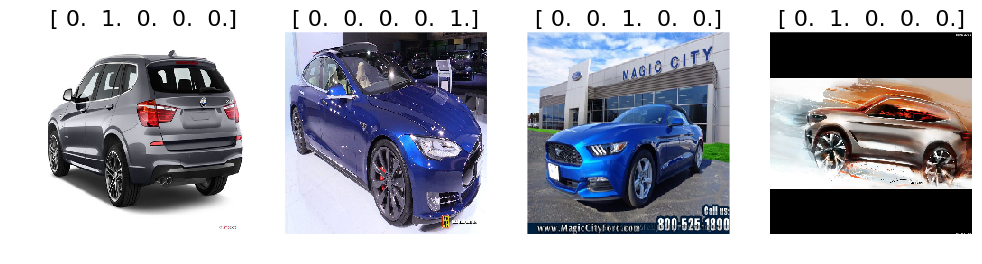

In [18]:
plots(imgs, titles=labels)

In [10]:
vgg.finetune(batches)

In [11]:
vgg.fit(batches, val_batches, nb_epoch=5)

Epoch 1/5
434/434 [==============================] - 184s - loss: 2.8860 - acc: 0.3111 - val_loss: 1.3951 - val_acc: 0.6296
Epoch 2/5
434/434 [==============================] - 184s - loss: 1.7677 - acc: 0.5023 - val_loss: 1.6976 - val_acc: 0.5185
Epoch 3/5
434/434 [==============================] - 184s - loss: 1.5823 - acc: 0.5922 - val_loss: 1.5741 - val_acc: 0.5000
Epoch 4/5
434/434 [==============================] - 180s - loss: 1.4286 - acc: 0.6498 - val_loss: 1.7686 - val_acc: 0.5556
Epoch 5/5
434/434 [==============================] - 178s - loss: 1.1399 - acc: 0.6705 - val_loss: 2.1425 - val_acc: 0.5926


In [12]:
vgg.model.save_weights(model_path+'finetune_5_epochs.h5')

Found 54 images belonging to 5 classes.


array([  7.3890e-05,   1.0550e-04,   2.0931e-02,   6.8668e-03,   7.4370e-01,   3.1881e-01,
         5.2408e-03,   2.5896e-02,   8.1946e-03,   1.9484e-01,   2.8924e-01,   3.3999e-04,
         3.0466e-04,   2.2564e-02,   8.1407e-03,   5.9974e-03,   5.6513e-04,   5.9856e-02,
         1.3653e-04,   6.4341e-04,   1.8691e-02,   7.4094e-05,   1.6949e-02,   4.3297e-05,
         1.0498e-05,   3.6460e-02,   2.0594e-05,   7.5426e-03,   3.2767e-03,   7.0893e-08,
         1.0765e-03,   4.8593e-04,   1.1133e-01,   2.6432e-07,   1.3796e-04,   3.1509e-03,
         1.8982e-03,   1.2902e-01,   3.5734e-03,   2.0297e-08,   7.0914e-01,   1.0044e-03,
         7.3795e-04,   4.1009e-07,   5.5751e-07,   1.5923e-03,   4.2024e-03,   3.2936e-03,
         2.6397e-04,   3.1777e-05,   8.8517e-04,   3.3207e-06,   1.4418e-03,   1.2531e-04], dtype=float32)

array([ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [19]:
vgg.predict(imgs, True)

(array([ 0.9079,  0.7951,  0.9999,  0.9923], dtype=float32),
 array([1, 4, 2, 1]),
 ['bmw_x3', 'tesla_model_s', 'ford_mustang_2016', 'bmw_x3'])

In [39]:
test_batches, probs = vgg.test(path+'test', batch_size=batch_size)
labels = test_batches.classes
filenames = test_batches.filenames

Found 53 images belonging to 5 classes.


In [41]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [42]:
filenames

['audi_a6/8.jpg',
 'audi_a6/80.jpg',
 'audi_a6/81.jpg',
 'audi_a6/82.jpg',
 'audi_a6/83.jpg',
 'audi_a6/84.jpg',
 'audi_a6/85.jpg',
 'audi_a6/86.jpg',
 'audi_a6/87.jpg',
 'audi_a6/88.jpg',
 'bmw_x3/8.jpg',
 'bmw_x3/80.jpg',
 'bmw_x3/81.jpg',
 'bmw_x3/82.jpg',
 'bmw_x3/83.jpg',
 'bmw_x3/84.jpg',
 'bmw_x3/85.jpg',
 'bmw_x3/86.jpg',
 'bmw_x3/87.jpg',
 'bmw_x3/88.jpg',
 'bmw_x3/89.jpg',
 'ford_mustang_2016/8.jpg',
 'ford_mustang_2016/80.jpg',
 'ford_mustang_2016/82.jpg',
 'ford_mustang_2016/83.jpg',
 'ford_mustang_2016/84.jpg',
 'ford_mustang_2016/85.jpg',
 'ford_mustang_2016/86.jpg',
 'ford_mustang_2016/87.jpg',
 'ford_mustang_2016/88.jpg',
 'ford_mustang_2016/89.jpg',
 'honda_civic_2006/8.jpg',
 'honda_civic_2006/80.jpg',
 'honda_civic_2006/81.jpg',
 'honda_civic_2006/82.jpg',
 'honda_civic_2006/83.jpg',
 'honda_civic_2006/84.jpg',
 'honda_civic_2006/85.jpg',
 'honda_civic_2006/86.jpg',
 'honda_civic_2006/87.jpg',
 'honda_civic_2006/88.jpg',
 'honda_civic_2006/89.jpg',
 'tesla_model_s/8.

In [43]:
probs

array([[  2.3330e-01,   4.4358e-04,   5.5461e-01,   2.9706e-04,   2.1135e-01],
       [  4.7143e-01,   2.0369e-05,   5.2714e-01,   2.5555e-04,   1.1501e-03],
       [  1.6432e-01,   1.7944e-01,   6.0568e-01,   4.4714e-02,   5.8503e-03],
       [  9.0698e-01,   1.6471e-03,   7.7550e-02,   1.3817e-02,   9.0435e-06],
       [  8.5339e-01,   7.1499e-04,   1.6726e-02,   1.2363e-01,   5.5439e-03],
       [  9.1721e-01,   8.3125e-03,   4.8500e-02,   2.3357e-04,   2.5748e-02],
       [  7.7083e-01,   1.4154e-03,   1.8889e-01,   1.9617e-02,   1.9251e-02],
       [  2.4295e-01,   5.4923e-07,   3.0463e-01,   1.6132e-04,   4.5226e-01],
       [  6.5659e-02,   2.5760e-04,   9.2389e-01,   5.7452e-03,   4.4521e-03],
       [  1.3542e-01,   2.3561e-05,   1.6192e-02,   1.3676e-03,   8.4700e-01],
       [  1.0221e-04,   3.0367e-01,   1.2769e-02,   6.8344e-01,   1.3917e-05],
       [  8.6317e-05,   9.1034e-01,   1.8385e-02,   5.0040e-02,   2.1144e-02],
       [  3.6080e-05,   9.9905e-01,   2.0165e-04,   

In [47]:
labels_predicted = [np.argmax(prob) for prob in probs]

In [48]:
labels_predicted

[2,
 2,
 2,
 0,
 0,
 0,
 0,
 4,
 2,
 4,
 3,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 2,
 4,
 4,
 2,
 4,
 3,
 4,
 4,
 4,
 4,
 4]

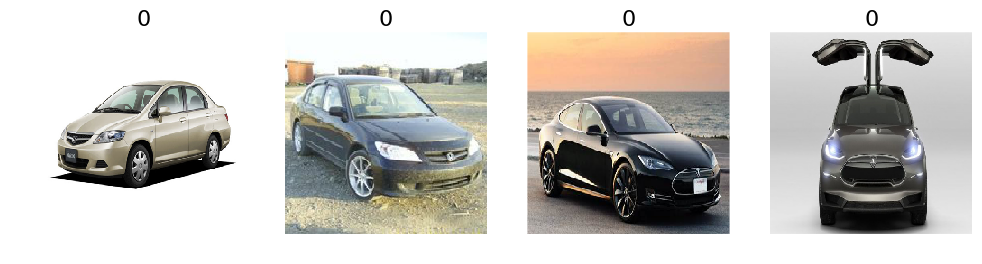

In [40]:
test_imgs = next(test_batches)
plots(test_imgs, titles=labels)

array([ 0.2333,  0.4714,  0.1643,  0.907 ,  0.8534,  0.9172,  0.7708,  0.243 ], dtype=float32)

array([ 1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.], dtype=float32)

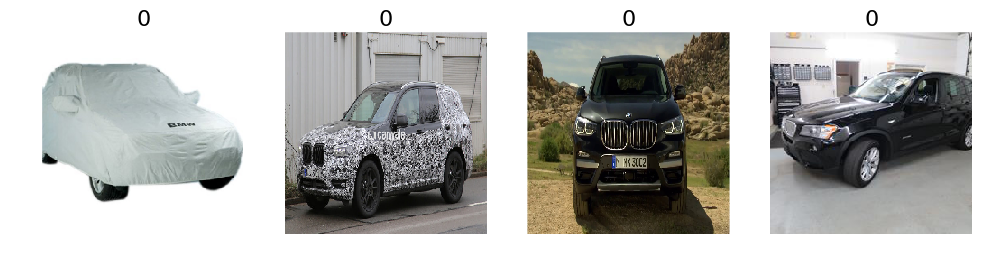

In [21]:
def plots_idx(idx, titles=None):
    """Helper function for plotting images by index in the validation set."""
    if len(idx) > 0:
        plots([image.load_img(path+'valid/'+filenames[i]) for i in idx], titles=titles)
    else:
        print "Nothing to plot!"